<a href="https://colab.research.google.com/github/SnowTrash/pyHikethroug/blob/main/I5912A_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando librerias

In [ ]:
#Librerias wonitas
%matplotlib inline
import sys
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pandas.core.arrays.sparse import array
print(sys.version)


3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


# Añadiendo el Dataset

> # Desde Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
local_path = '/content/drive/MyDrive/Clasificacion Inteligente de datos - I5912/src/A9_dataset.csv'
fh = open(local_path)
csv_reader = csv.reader(fh)
fh.close()

In [ ]:
df = pd.read_csv(local_path,header=None)
df

,0,1,2,3,4,5,6,7
0,Mobiliario,Mobiliario.1,SILLON EJECUTIVO RESPALDO MEDIO COLOR NEGRO. N...,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,Mobiliario,Mobiliario,PINTARRON 60X90 (ALTA 20 ENE 1999 MARCA ALFRA).,NaN,NaN,NaN,NaN,NaN
2,Equipo,Equipo,"MONITOR DE COLOR HP DE 15"", N.D. 017/2002 ALTA...",NaN,NaN,NaN,NaN,NaN
3,Mobiliario,Mobiliario,"CESTO DE BASURA ALUMINIO N.D. 007/2005, ALTA 3...",NaN,NaN,NaN,NaN,NaN
4,Transporte,Transporte,"AUTOMOVIL FORD ESCORT 1998, PLACAS: HZG1129, N...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9995,Equipo,Equipo,COMPUTADORA SEGÚN FACTURA 729 DE VICENTE DE LA...,NaN,NaN,NaN,NaN,NaN
9996,Equipo,Equipo,PINTARRON MARCA ALFRA COLOR BLANCO MODELO 4840...,NaN,NaN,NaN,NaN,NaN
9997,Equipo,Equipo,"REGULADOR DE VOLTAJE INDUSTRONIC, 15KVA, COLOR...",NaN,NaN,NaN,NaN,NaN
9998,Equipo,Equipo,TP- LINK 1000BASE-LX SFP OPTIC SMF MINI GBIC M...,NaN,NaN,NaN,NaN,NaN


> # Local

In [ ]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt

#Con estas 2 lineas creamos el archivo .csv de un .xlsx

#read_file = pd.read_excel (r'src/A9_dataset.xlsx')
#read_file.to_csv (r'src/A9_dataset.csv', index = None, header=True)

#df = pd.read_csv('src/A9_dataset.csv', header=None)
#print(len(df))

# Primer contacto

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9997 non-null   object
 1   1       9997 non-null   object
 2   2       9993 non-null   object
 3   3       43 non-null     object
 4   4       29 non-null     object
 5   5       12 non-null     object
 6   6       7 non-null      object
 7   7       4 non-null      object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7
0,Mobiliario,Mobiliario.1,SILLON EJECUTIVO RESPALDO MEDIO COLOR NEGRO. N...,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,Mobiliario,Mobiliario,PINTARRON 60X90 (ALTA 20 ENE 1999 MARCA ALFRA).,NaN,NaN,NaN,NaN,NaN
2,Equipo,Equipo,"MONITOR DE COLOR HP DE 15"", N.D. 017/2002 ALTA...",NaN,NaN,NaN,NaN,NaN
3,Mobiliario,Mobiliario,"CESTO DE BASURA ALUMINIO N.D. 007/2005, ALTA 3...",NaN,NaN,NaN,NaN,NaN
4,Transporte,Transporte,"AUTOMOVIL FORD ESCORT 1998, PLACAS: HZG1129, N...",NaN,NaN,NaN,NaN,NaN


In [ ]:
y =df[[0,2]]
df_sb = pd.DataFrame(y)
df_sb.columns = ['Tipo','Descripcion']
print(df_sb.head())
type(df_sb)

         Tipo                                        Descripcion
0  Mobiliario  SILLON EJECUTIVO RESPALDO MEDIO COLOR NEGRO. N...
1  Mobiliario    PINTARRON 60X90 (ALTA 20 ENE 1999 MARCA ALFRA).
2      Equipo  MONITOR DE COLOR HP DE 15", N.D. 017/2002 ALTA...
3  Mobiliario  CESTO DE BASURA ALUMINIO N.D. 007/2005, ALTA 3...
4  Transporte  AUTOMOVIL FORD ESCORT 1998, PLACAS: HZG1129, N...


pandas.core.frame.DataFrame

# nltlk - Leyendo el inventario

* nltk.download('punkt')
* nltk.download('stopwords')
* nltk.download('otraslibrerias')

In [ ]:
#Importamos las herramientas para procesar texto (se necesitan descargar)
import nltk

#nltk.download('punkt')
#nltk.download('stopwords')


#Despues de buen rato de pelear con la funcion, entendi que:
#Toma NaN como valor flotante en la opeacion asi que
df_sb = df_sb.dropna()

In [ ]:
#definimos el stopwords en espaniol
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# function to clean data
def clean_data(df, col, clean_col):
      
    #df[str(clean_col)] = df[str(clean_col)].apply(lambda x: x.lower())

    # Tokenizamos el texto --->tokens = 
    df[str(clean_col)] = df.apply(lambda row: nltk.word_tokenize(row[str(col)]), axis=1)
        
    #df[str(clean_col)] = df.apply(lambda row: row[(col)].lower(), axis=1)

    # remove extra spaces in between
    #df[str(clean_col)] = df[str(clean_col)].apply(lambda x: nltk.re.sub('+', ' ', x))
    
    # remove punctuation
    #df[str(clean_col)] = df.apply(lambda x: nltk.re.sub('[^a-zA-Z]', ' ', x))
    
    #remove stopwords and get the stem
    #df["stopworded"] = df[str(clean_col)].apply(lambda x: ' '.join(SnowballStemmer('spanish').stem(text) for text in x if text not in stopwords.words('spanish') ))
    return df

In [ ]:
print(df_sb.columns.tolist())
res = clean_data(df_sb.head(70),'Descripcion','stopworded')

['Tipo', 'Descripcion']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
res.head(5)

,Tipo,Descripcion,stopworded
0,Mobiliario,SILLON EJECUTIVO RESPALDO MEDIO COLOR NEGRO. N...,"[SILLON, EJECUTIVO, RESPALDO, MEDIO, COLOR, NE..."
1,Mobiliario,PINTARRON 60X90 (ALTA 20 ENE 1999 MARCA ALFRA).,"[PINTARRON, 60X90, (, ALTA, 20, ENE, 1999, MAR..."
2,Equipo,"MONITOR DE COLOR HP DE 15"", N.D. 017/2002 ALTA...","[MONITOR, DE, COLOR, HP, DE, 15, '', ,, N.D., ..."
3,Mobiliario,"CESTO DE BASURA ALUMINIO N.D. 007/2005, ALTA 3...","[CESTO, DE, BASURA, ALUMINIO, N.D., 007/2005, ..."
4,Transporte,"AUTOMOVIL FORD ESCORT 1998, PLACAS: HZG1129, N...","[AUTOMOVIL, FORD, ESCORT, 1998, ,, PLACAS, :, ..."


--------------------------
Class_1
* Equipo        41
* Mobiliario    28
* Transporte     1
* Name: tokenized_items, dtype: int64
--------------------------
--------------------------
Class_2
* Equipo          41
* Mobiliario      27
* Mobiliario.1     1
* Transporte       1
* Name: tokenized_items, dtype: int64


In [ ]:
print('--------------------------')
res.groupby(by='Tipo')['stopworded'].count()

--------------------------


Tipo
Equipo        41
Mobiliario    28
Transporte     1
Name: stopworded, dtype: int64

En este punto, tratare de arreglar las stopwords, donde creo que esta el problema , pues lee las 'o' finales de una palabra como una non-noun, una marca del lenguaje


print(stopwords.words('spanish'))

In [ ]:
inventario = res.explode(column='stopworded')

In [ ]:
print('Palabras totales por categoria')
print('--------------------------')
print(inventario.groupby(by='Tipo')['Descripcion'].count())
print('--------------------------')
print('--------------------------')
print('Palabras distintas en las categorias')
print(inventario.groupby(by='Tipo')['stopworded'].nunique())
print('--------------------------')

Palabras totales por categoria
--------------------------
Tipo
Equipo        204
Mobiliario    166
Transporte      7
Name: Descripcion, dtype: int64
--------------------------
--------------------------
Palabras distintas en las categorias
Tipo
Equipo        169
Mobiliario    140
Transporte      7
Name: stopworded, dtype: int64
--------------------------


In [ ]:
# Obtención de listado de stopwords del espanol
# ==============================================================================
stop_words = list(stopwords.words('spanish'))
stop_words = list(map(lambda x: x.upper(),stop_words))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe",")","(","'",",","",".",":","","7.1","6","15","MARCA","1","ALTA","N.D"))
stop_words.extend(("COMPLETA","256MB","S/N","AZUL","1998","N.D.","COLOR","X","NEGRO","CM","MODELO","S/M","LCD"))
stop_words.extend(("2002","GRIS","3FABP1136WR109452","SERIE","AGOSTO","''","ALTURA","CAOBA","GHZ"))

print(stop_words[:10])
inventario = inventario[~(inventario["stopworded"].isin(stop_words))]

['DE', 'LA', 'QUE', 'EL', 'EN', 'Y', 'A', 'LOS', 'DEL', 'SE']


In [ ]:
inventario.groupby(['Tipo','stopworded'])['stopworded'] \
 .count() \
 .reset_index(name='count') \
 .groupby('Tipo') \
 .apply(lambda x: x.sort_values('count', ascending=True).tail(13)) 

Tipo   stopworded  count
Tipo                                          
Equipo     150      Equipo     SOFTWARE      2
           138      Equipo        RATÓN      2
           56       Equipo       COGNOS      2
           61       Equipo          CPU      2
           146      Equipo       SCROLL      2
           60       Equipo     CORDLESS      2
           155      Equipo     TELEFONO      3
           91       Equipo           HP      3
           125      Equipo      PENTIUM      3
           165      Equipo        VIDEO      3
           115      Equipo      MONITOR      4
           51       Equipo          CDS      4
           59       Equipo  COMPUTADORA      4
Mobiliario 228  Mobiliario     CUBIERTA      2
           225  Mobiliario      CODERAS      2
           218  Mobiliario      CAJONES      2
           260  Mobiliario      MAMPARA      2
           259  Mobiliario       MADERA      2
           262  Mobiliario      MEDIDAS      2
           264  Mobiliario         MESA      3
           295  Mobiliario       SILLON      3
           234  Mobiliario   ESCRITORIO      3
           232  Mobiliario    EJECUTIVO      3
           293  Mobiliario        SILLA      4
           216  Mobiliario        CAJON      4
           300  Mobiliario         TELA      6
Transporte 309  Transporte    AUTOMOVIL      1
           310  Transporte        ECONÓ      1
           311  Transporte       ESCORT      1
           312  Transporte         FORD      1
           313  Transporte      HZG1129      1
           314  Transporte        MOTOR      1
           315  Transporte       PLACAS      1

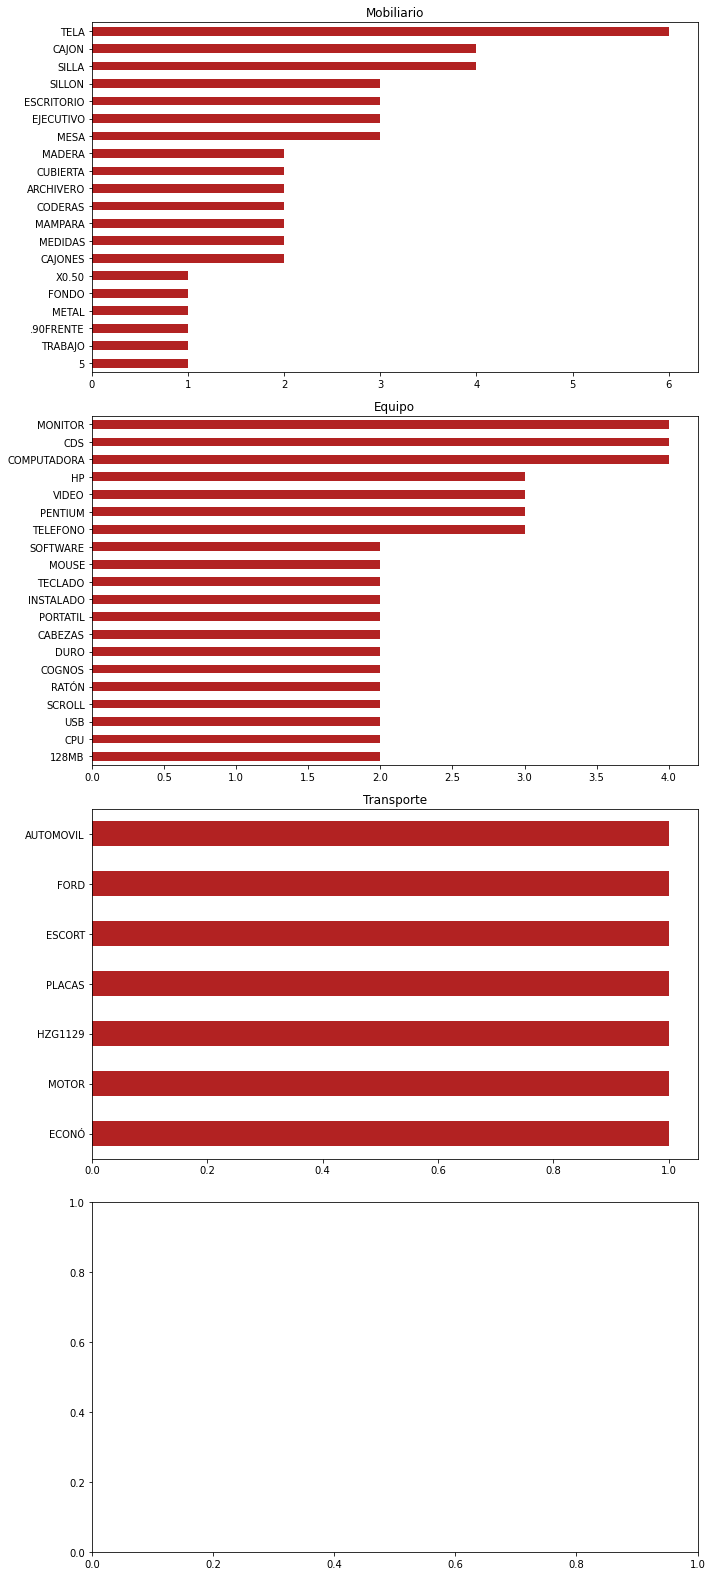

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(10, 22))
for i, Tipo in enumerate(inventario.Tipo.unique()):
    df_temp = inventario[inventario.Tipo == Tipo]
    counts  = df_temp['stopworded'].value_counts(ascending=False).head(20)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(Tipo)
fig.tight_layout()

In [ ]:
file_name = "/content/drive/MyDrive/Clasificacion Inteligente de datos - I5912/src/A9_final_data.csv"
inventario.to_csv(file_name, sep='\t', encoding='utf-8')

# Conclusion
> # Existen 3 categorias obtenidas de las clases:
estas categorias podrian quedas solo en transporte ye mobiliario
> 1. Transporte
  >> * Automobil Ford Escort -- UNO
> 2. Equipo
  >> * Monitor --
  >> * Cds --
  >> * Computadoras
  >> * Monitores
  >> * Telefono
  >> * Mouse
  >> * Teclado
  >> * Portatil
  >> * USB
  
> 3. Mobiliario
  >> * Cajon
  >> * Silla 
  >> * Sillon 
  >> * Escritorio
  >> * mesa
  >> * archivero
  >> * mamparas